# SysFlow FloCon 2020 Tutorial Demo
Tutorial demo session presented at FloCon 2020. Please check [abstract and presentation slides](https://flocon2020.sched.com/event/VPW3/sysflow-scalable-system-telemetry-for-improved-security-analytics) at the conference website. 

In [1]:
# sysflow libraries
from sysflow.reader import FlattenedSFReader
from sysflow.formatter import SFFormatter

## Data Exploration

In [2]:
# additional libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 75)

In [3]:
# sysflow trace path and selected attributes to display
trace = 'data/objectstore/download.sf'
cols=['ts_uts', 'endts_uts', 'type', 'opflags', 'proc.pid', 'proc.tid', 'proc.exe', 'res', 'flow.rbytes', 'flow.wbytes', 'flow.rops', 'flow.wops', 'container.imageid']

In [4]:
# read sysfow records into a pandas dataframe
reader = FlattenedSFReader(trace)
formatter = SFFormatter(reader)
df = formatter.toDataframe(fields=cols)
df.shape

(220, 13)

In [5]:
# display a few records filtering file and network flows with READ/RECEIVE operations
df[(df.type.isin(['FF','NF'])) & (df.opflags.str.contains('R'))].tail(20)

,ts_uts,endts_uts,type,opflags,proc.pid,proc.tid,proc.exe,res,flow.rbytes,flow.wbytes,flow.rops,flow.wops,container.imageid
199,1555013930201923664,1.555014e+18,FF,O R C,13144,13144,/usr/bin/minio,/data/.minio.sys/buckets/play/mon.1548966016/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
200,1555013930197179649,1.555014e+18,NF,A WR T,13144,13179,/usr/bin/minio,172.17.0.5:52940-172.17.0.4:9000,1053.0,421.0,4.0,1.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
201,1555013930200065133,1.555014e+18,NF,WR T,13144,13185,/usr/bin/minio,172.17.0.5:52940-172.17.0.4:9000,963.0,972.0,4.0,2.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
202,1555013930198104699,1.555014e+18,NF,WR C,13144,13144,/usr/bin/minio,172.17.0.5:52940-172.17.0.4:9000,0.0,21995.0,1.0,4.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
203,1555013930203486343,1.555014e+18,FF,O R C,13144,13179,/usr/bin/minio,/data/.minio.sys/buckets/play/mon.1548966016/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
204,1555013930203635386,1.555014e+18,FF,O R C,13144,13179,/usr/bin/minio,/data/play/mon.1548966016,10885.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
205,1555013930203603871,1.555014e+18,FF,O R C,13144,13179,/usr/bin/minio,/data/.minio.sys/buckets/play/mon.1548966016/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
207,1555013930205607500,1.555014e+18,FF,O R C,13144,13144,/usr/bin/minio,/data/.minio.sys/buckets/play/tcpclientserver/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
208,1555013930206704188,1.555014e+18,FF,O R C,13144,13179,/usr/bin/minio,/data/.minio.sys/buckets/play/tcpclientserver/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718
209,1555013930207555855,1.555014e+18,FF,O R C,13144,13144,/usr/bin/minio,/data/.minio.sys/buckets/play/tcpclientserver/fs.json,168.0,0.0,1.0,0.0,3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718


In [6]:
# display a few records
flows = df[(df.type.isin(['FF','NF']))]
flows[['flow.rbytes', 'flow.wbytes', 'flow.rops', 'flow.wops']].astype('int32').describe()

,flow.rbytes,flow.wbytes,flow.rops,flow.wops
count,197.000000,197.000000,197.000000,197.000000
mean,2199.736041,2092.619289,1.350254,0.416244
std,6480.210999,7720.554313,1.946782,1.211905
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,168.000000,0.000000,1.000000,0.000000
75%,517.000000,0.000000,1.000000,0.000000
max,34283.000000,64206.000000,20.000000,8.000000


In [7]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates
ax = flows[['ts_uts', 'flow.rbytes', 'flow.wbytes']].plot.bar(x='ts_uts', y=['flow.rbytes','flow.wbytes'], rot=45, figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MicrosecondLocator(interval=1000))
plt.gcf().autofmt_xdate()
plt.show()

<Figure size 2000x500 with 1 Axes>

## Data Conversion

In [8]:
# Read and dump sysflow records as JSON file
import json
reader = FlattenedSFReader(trace)
formatter = SFFormatter(reader)
formatter.toJsonFile(path='/tmp/json')

In [9]:
# Load and print sysflow records as JSON
with open('/tmp/json') as jsonfile:
    js =json.load(jsonfile)
print(json.dumps(js, indent=2, sort_keys=True))

[
  {
    "container": {
      "id": "8661fade8683",
      "image": "minio/minio/latest",
      "imageid": "3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718",
      "name": "minio",
      "privileged": false,
      "type": "CT_DOCKER"
    },
    "endts": "",
    "endts_uts": null,
    "file": {
      "fd": "",
      "newpath": "",
      "openflags": "",
      "path": ""
    },
    "flow": {
      "rbytes": null,
      "rops": null,
      "wbytes": null,
      "wops": null
    },
    "net": {
      "dip": "",
      "dport": null,
      "proto": "",
      "sip": "",
      "sport": null
    },
    "opflags": "CLONE",
    "opflags_bitmap": 1,
    "pproc": {
      "args": "",
      "createts": "",
      "exe": "",
      "gid": null,
      "group": "",
      "pid": null,
      "tty": "",
      "uid": null,
      "user": ""
    },
    "proc": {
      "args": "init",
      "createts": 0,
      "exe": "docker-runc",
      "gid": -1,
      "group": "",
      "pid": 17059,
      "

In [10]:
# We can also dump sysflow records in a "flat" representation
import json
reader = FlattenedSFReader(trace)
formatter = SFFormatter(reader)
formatter.toJsonFile(path='/tmp/json', flat=True)
with open('/tmp/json') as jsonfile:
    js =json.load(jsonfile)
print(json.dumps(js, indent=2, sort_keys=True))

[
  {
    "container.id": "8661fade8683",
    "container.image": "minio/minio/latest",
    "container.imageid": "3120d28bc5cab700ef2e78d932fbd6707a6891b38ed8b280ad794fe68fae9718",
    "container.name": "minio",
    "container.privileged": false,
    "container.type": "CT_DOCKER",
    "endts": "",
    "endts_uts": null,
    "file.fd": "",
    "file.newpath": "",
    "file.openflags": "",
    "file.path": "",
    "flow.rbytes": null,
    "flow.rops": null,
    "flow.wbytes": null,
    "flow.wops": null,
    "net.dip": "",
    "net.dport": null,
    "net.proto": "",
    "net.sip": "",
    "net.sport": null,
    "opflags": "CLONE",
    "opflags_bitmap": 1,
    "pproc.args": "",
    "pproc.createts": "",
    "pproc.exe": "",
    "pproc.gid": null,
    "pproc.group": "",
    "pproc.pid": null,
    "pproc.tty": "",
    "pproc.uid": null,
    "pproc.user": "",
    "proc.args": "init",
    "proc.createts": 0,
    "proc.exe": "docker-runc",
    "proc.gid": -1,
    "proc.group": "",
    "proc.pid

## Query API

In [11]:
trace = 'data/attacks/express/mon.1531776712.sf'
cols=['ts_uts', 'endts_uts', 'type', 'opflags', 'proc.pid', 'proc.tid', 'proc.exe', 'file.path', 'flow.rbytes', 'flow.wbytes', 'container.imageid']

In [12]:
# Initial indicator of compromise
reader = FlattenedSFReader(trace)
query = 'type = FF and file.type = f and opflags contains WRITE and proc.name pmatch (http_server_binaries)'
formatter = SFFormatter(reader, defs=['sfql/defs.yaml'])
df = formatter.toDataframe(expr=query, fields=cols)
df.head()

,ts_uts,endts_uts,type,opflags,proc.pid,proc.tid,proc.exe,file.path,flow.rbytes,flow.wbytes,container.imageid
0,1531776715030353952,1531776715030578781,FF,W T,2025,12406,/usr/local/bin/node,/tmp/exfil.py,0,6537,55f142ac5da7d234c7bba0662149e26bada9c6baaf504f632e13c840206fab7b


In [13]:
# Policies can also be defined and reused
reader = FlattenedSFReader(trace)
formatter = SFFormatter(reader, defs=['sfql/defs.yaml'])
df = formatter.toDataframe(expr='suspicious_webserver_writes', fields=cols)
df.head()

,ts_uts,endts_uts,type,opflags,proc.pid,proc.tid,proc.exe,file.path,flow.rbytes,flow.wbytes,container.imageid
0,1531776715030353952,1531776715030578781,FF,W T,2025,12406,/usr/local/bin/node,/tmp/exfil.py,0,6537,55f142ac5da7d234c7bba0662149e26bada9c6baaf504f632e13c840206fab7b


In [14]:
trace = 'data/attacks/express/mon.1531776712.sf'
cols_=['ts_uts', 'type', 'opflags', 'pproc.pid', 'proc.pid', 'pproc.exe', 'proc.exe', 'proc.args']

In [15]:
# Finding all process executions involving suspicious script
reader = FlattenedSFReader(trace)
query = 'type = PE and opflags = EXEC and (proc.aname contains exfil.py or proc.args contains exfil.py or file.path contains exfil.py)'
formatter = SFFormatter(reader)
df = formatter.toDataframe(expr=query, fields=cols_)
df.head(20)

,ts_uts,type,opflags,pproc.pid,proc.pid,pproc.exe,proc.exe,proc.args
0,1531776715041743005,PE,EXEC,2025,17753,/usr/local/bin/node,/bin/sh,-c /tmp/exfil.py -a
1,1531776715049024767,PE,EXEC,17753,17754,/bin/sh,/tmp/exfil.py,/tmp/exfil.py -a
2,1531776715077890260,PE,EXEC,17754,17757,/tmp/exfil.py,/tmp/exfil.py,/tmp/exfil.py -a
3,1531776715078056634,PE,EXEC,17754,17757,/tmp/exfil.py,/tmp/exfil.py,/tmp/exfil.py -a
4,1531776715078110412,PE,EXEC,17754,17757,/tmp/exfil.py,/tmp/exfil.py,/tmp/exfil.py -a
5,1531776715078162793,PE,EXEC,17754,17757,/tmp/exfil.py,/tmp/exfil.py,/tmp/exfil.py -a
6,1531776715078210871,PE,EXEC,17754,17757,/tmp/exfil.py,/tmp/exfil.py,/tmp/exfil.py -a
7,1531776715078687969,PE,EXEC,17754,17757,/tmp/exfil.py,/usr/bin/apt-get,update
8,1531776716574185341,PE,EXEC,17757,17758,/usr/bin/apt-get,/usr/bin/apt-get,--print-foreign-architectures
9,1531776718037729035,PE,EXEC,17757,17767,/usr/bin/apt-get,/usr/bin/apt-get,


In [16]:
_trace = 'data/attacks/express/mon.1531776742.sf'
_cols=['ts_uts', 'type', 'opflags', 'proc.pid', 'pproc.exe', 'proc.exe', 'proc.args', 'net.sip', 'net.sport', 'net.dip', 'net.dport', 'flow.rbytes', 'flow.wbytes']

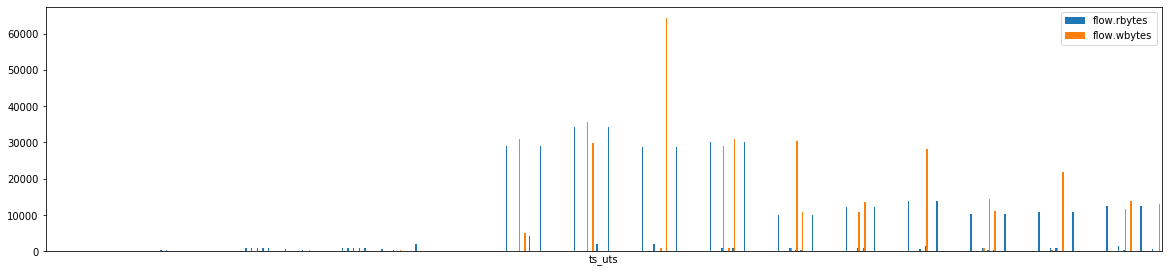

In [17]:
# Finding all network flows related to suspicious script
reader = FlattenedSFReader(_trace)
query = 'type = NF and (proc.aname contains exfil.py or proc.args contains exfil.py or file.path contains exfil.py)'
formatter = SFFormatter(reader)
df = formatter.toDataframe(expr=query, fields=_cols)

ax = flows[['ts_uts', 'flow.rbytes', 'flow.wbytes']].plot.bar(x='ts_uts', y=['flow.rbytes','flow.wbytes'], rot=45, figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MicrosecondLocator(interval=1000))
plt.gcf().autofmt_xdate()
plt.show()

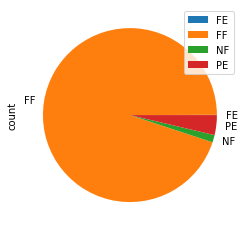

In [18]:
# Summarizing sysflow types
reader = FlattenedSFReader(trace)
formatter = SFFormatter(reader)
df = formatter.toDataframe(fields=cols)
types = df.groupby(['type']).count()[['ts_uts']].rename(columns={"ts_uts": "count"}) 
pie = types.plot.pie(subplots=True)

In [19]:
# Rank ordering file operations
_df = df.replace('', np.nan).dropna(axis=0, how='any', subset=['file.path'])
paths = _df[cols].groupby(['file.path']).count()[['ts_uts']].rename(columns={"ts_uts": "count"})
paths.sort_values(by='count', ascending=False)

,count
file.path,
/etc/ld.so.cache,96
/lib/x86_64-linux-gnu/libc.so.6,48
/dev/null,20
pipe:[66729332],18
/etc/hosts,16
...,...
/var/lib/apt/lists/lock,1
/etc/services,1
/etc/apt/sources.list.d,1


## Reader API

**Note:** See [formatter.py](https://github.com/sysflow-telemetry/sf-apis/blob/master/py3/classes/sysflow/formatter.py) for a more advanced example of how to use the reader API.


In [20]:
import sysflow.utils as utils
from sysflow.objtypes import ObjectTypes
from IPython.display import display, HTML, Markdown

In [21]:
trace = 'data/attacks/express/mon.1531776712.sf'

In [22]:
# Using the flattened reader to find initial indicator of compromise
reader = FlattenedSFReader(trace)
head = 20 # max number of records to print
for i, (objtype, header, cont, pproc, proc, files, evt, flow) in enumerate(reader):
    exe = proc.exe
    pid = proc.oid.hpid if proc else ''
    evflow = evt or flow
    tid = evflow.tid if evflow else ''
    opFlags = utils.getOpFlagsStr(evflow.opFlags) if evflow else '' 
    sTime = utils.getTimeStr(evflow.ts) if evflow else ''
    eTime = utils.getTimeStr(evflow.endTs) if flow else ''
    ret = evflow.ret if evt else ''
    res1 = ''
    if objtype == ObjectTypes.FILE_FLOW or objtype == ObjectTypes.FILE_EVT:
        res1 = files[0].path
    elif objtype == ObjectTypes.NET_FLOW:
        res1 = utils.getNetFlowStr(flow) 
    numBReads = evflow.numRRecvBytes if flow else ''
    numBWrites = evflow.numWSendBytes if flow else ''
    res2 = files[1].path if files and files[1] else ''
    cont = cont.id if cont else '' 
    display(Markdown("<span style=\"font-size:11pt;\">|{0:30}|{1:9}|{2:26}|{3:26}|{4:30}|{5:8}|{6:8}|</span>"
                     .format(exe, opFlags, sTime, eTime, res1, numBReads, numBWrites)))   
    if i == head:
        break

<span style="font-size:11pt;">|/usr/local/bin/node           |CLONE    |07/16/2018T21:31:52.370537|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/bin/dash                     |CLONE    |07/16/2018T21:31:52.370578|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/usr/local/bin/node           |        C  |07/16/2018T21:31:52.370611|07/16/2018T21:31:52.370611|                              |       0|       0|</span>

<span style="font-size:11pt;">|/bin/sh                       |EXEC     |07/16/2018T21:31:52.371724|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/usr/local/bin/node           |    R   C  |07/16/2018T21:31:52.371749|07/16/2018T21:31:52.371752|                              |       0|       0|</span>

<span style="font-size:11pt;">|/usr/local/bin/node           |        C  |07/16/2018T21:31:52.371756|07/16/2018T21:31:52.371756|                              |       0|       0|</span>

<span style="font-size:11pt;">|/usr/local/bin/node           |        C  |07/16/2018T21:31:52.371763|07/16/2018T21:31:52.371763|                              |       0|       0|</span>

<span style="font-size:11pt;">|/usr/local/bin/node           |        C  |07/16/2018T21:31:52.371766|07/16/2018T21:31:52.371766|                              |       0|       0|</span>

<span style="font-size:11pt;">|/usr/local/bin/node           | A WR   C  |07/16/2018T21:31:52.366998|07/16/2018T21:31:52.372548|10.187.39.243:49824-172.30.106.116:3000|      95|     362|</span>

<span style="font-size:11pt;">|/bin/sh                       |O       C  |07/16/2018T21:31:52.372761|07/16/2018T21:31:52.372772|/etc/ld.so.cache              |       0|       0|</span>

<span style="font-size:11pt;">|/bin/sh                       |O   R   C  |07/16/2018T21:31:52.372787|07/16/2018T21:31:52.372832|/lib/x86_64-linux-gnu/libc.so.6|     832|       0|</span>

<span style="font-size:11pt;">|/bin/sh                       |CLONE    |07/16/2018T21:31:52.373299|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/usr/bin/python2.7            |CLONE    |07/16/2018T21:31:52.373318|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/usr/bin/python               |EXEC     |07/16/2018T21:31:52.373715|                          |                              |        |        |</span>

<span style="font-size:11pt;">|/usr/bin/python               |O       C  |07/16/2018T21:31:52.373802|07/16/2018T21:31:52.373813|/etc/ld.so.cache              |       0|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.373827|07/16/2018T21:31:52.373868|/lib/x86_64-linux-gnu/libpthread.so.0|     832|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.373882|07/16/2018T21:31:52.373912|/lib/x86_64-linux-gnu/libdl.so.2|     832|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.373924|07/16/2018T21:31:52.373957|/lib/x86_64-linux-gnu/libutil.so.1|     832|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.373969|07/16/2018T21:31:52.373996|/lib/x86_64-linux-gnu/libz.so.1|     832|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.374010|07/16/2018T21:31:52.374038|/lib/x86_64-linux-gnu/libm.so.6|     832|       0|</span>

<span style="font-size:11pt;">|/usr/bin/python               |O   R   C  |07/16/2018T21:31:52.374051|07/16/2018T21:31:52.374089|/lib/x86_64-linux-gnu/libc.so.6|     832|       0|</span>